### 2 - Exploratory Data Analysis

Nesta etapa, realizamos a exploração dos dados por meio de visualizações gráficas, utilizando as bibliotecas **Matplotlib** e **Seaborn**. A exploração busca trazer *insights* de relações entre as *features* do conjunto e levantar possíveis alterações de *feature engenieer*.

In [1]:
#Importar bibliotecas

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Importar os dados tratados

df = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Customer-Clustering/data/dados_tratado.csv", header=0)
df.head(1)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2


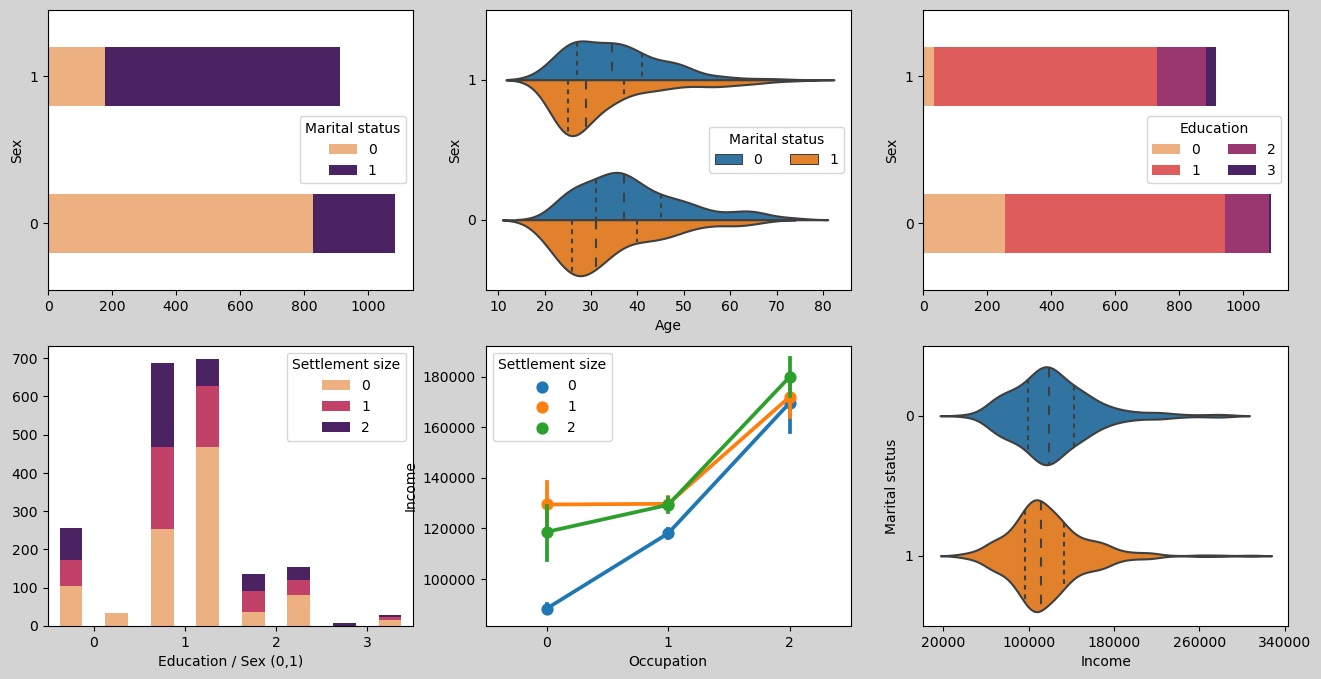

In [31]:

palette = sns.color_palette("flare", as_cmap=True)
fig, axs = plt.subplots(2,3, figsize=(16,8), facecolor="lightgray")

#Sex x Marital status

sex_ms = df.groupby(["Sex","Marital status"]).size().unstack(fill_value=0)
sex_ms.plot(kind="barh", stacked=True, ax=axs[0,0], colormap=palette, width=0.4)

#Sex x Age x Marital status


sns.violinplot(ax=axs[0,1], data=df, y='Sex', x="Age", orient="h", hue="Marital status", split=True, inner="quart", order=[1,0])
axs[0,1].legend(loc="center right", title="Marital status", ncol=2)

#Sex x Education

sex_education = df.groupby(["Sex", "Education"]).size().unstack(fill_value=0)
sex_education.plot(kind="barh", stacked=True, ax=axs[0,2], colormap=palette, width=0.4)
axs[0,2].legend(loc="center right", title="Education", ncol=2)

#Sex x Education x Settlement size

s_e_s = df.groupby(["Education", "Sex", "Settlement size"]).size().unstack(fill_value=0)
s_e_s.plot(kind="bar", stacked=True, ax=axs[1,0], colormap=palette)
axs[1,0].set_xticks([0.5, 2.5, 4.5, 6.5], labels=[0,1,2,3], rotation=0)
axs[1,0].set_xlabel("Education / Sex (0,1)")

#Occupation x Settlement size x Income

sns.pointplot(data=df, x="Occupation", y="Income", hue="Settlement size", ax=axs[1,1], )
axs[1,1].set_ylabel("Income")

#Income x Marital status

sns.violinplot(df, y="Marital status", x ="Income", orient="h", ax=axs[1,2], inner="quarter")
axs[1,2].set_xticks([20000, 100000, 180000, 260000, 340000])

plt.show()
